# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from matplotlib.colors import LinearSegmentedColormap
from sklearn.feature_selection import mutual_info_classif

warnings.filterwarnings('ignore')

In [ ]:
# Set the style of the plot to a dark background
sns.set_style("whitegrid")

# Customize the seaborn style with specific colors and context settings
sns.set(rc={
    "axes.facecolor": "#f2e5ff",  # Set the face color of the axes to a light violet
    "figure.facecolor": "#f2e5ff",  # Set the face color of the entire figure to a light violet
    "grid.color": "#e0c3ff"  # Set the color of the grid lines to a soft violet
})

# Set the context to "poster" size with a specific font scale
sns.set_context("poster", font_scale=0.7)

# Define custom color palettes for seaborn plots
palette = ["#8a2be2", "#9370db", "#ba55d3", "#dda0dd", "#ee82ee"]
palette_cmap = ["#9370db", "#ba55d3", "#8a2be2", "#dda0dd", "#ee82ee"]

# Data Exploration

## Basic Steps


In [ ]:
# Import the datasets
train = pd.read_parquet('../../data/UNSW_NB15_data/UNSW_NB15_training-set.parquet')
test = pd.read_parquet('../../data/UNSW_NB15_data/UNSW_NB15_testing-set.parquet')

In [ ]:
# Display the shape of the datasets
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

Train shape: (175341, 36)
Test shape: (82332, 36)


In [ ]:
# Display information about the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   dur                175341 non-null  float32 
 1   proto              175341 non-null  category
 2   service            175341 non-null  category
 3   state              175341 non-null  category
 4   spkts              175341 non-null  int16   
 5   dpkts              175341 non-null  int16   
 6   sbytes             175341 non-null  int32   
 7   dbytes             175341 non-null  int32   
 8   rate               175341 non-null  float32 
 9   sload              175341 non-null  float32 
 10  dload              175341 non-null  float32 
 11  sloss              175341 non-null  int16   
 12  dloss              175341 non-null  int16   
 13  sinpkt             175341 non-null  float32 
 14  dinpkt             175341 non-null  float32 
 15  sjit               175341 non-null

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   dur                82332 non-null  float32 
 1   proto              82332 non-null  category
 2   service            82332 non-null  category
 3   state              82332 non-null  category
 4   spkts              82332 non-null  int16   
 5   dpkts              82332 non-null  int16   
 6   sbytes             82332 non-null  int32   
 7   dbytes             82332 non-null  int32   
 8   rate               82332 non-null  float32 
 9   sload              82332 non-null  float32 
 10  dload              82332 non-null  float32 
 11  sloss              82332 non-null  int16   
 12  dloss              82332 non-null  int16   
 13  sinpkt             82332 non-null  float32 
 14  dinpkt             82332 non-null  float32 
 15  sjit               82332 non-null  float32 
 16  djit

In [ ]:
# Display the dataset description
train.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sload,dload,sloss,dloss,...,dmean,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,...,175341.000000,175341.000000,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,95406.179688,7.345403e+07,6.712055e+05,4.953000,6.948010,...,124.173382,0.105982,2.144292e+03,5.383538,4.206255,0.014948,0.014948,0.133066,0.015752,0.680622
std,6.483313,136.887597,110.258271,1.747656e+05,1.436542e+05,165417.671875,1.883701e+08,2.423637e+06,66.005059,52.732999,...,258.317056,0.776911,5.420797e+04,8.047104,5.783585,0.126048,0.126048,0.701208,0.124516,0.466237
min,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,32.786140,1.305334e+04,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3225.806641,8.796748e+05,1.447023e+03,0.000000,0.000000,...,44.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,125000.000000,8.888889e+07,2.784487e+04,3.000000,2.000000,...,89.000000,0.000000,0.000000e+00,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1000000.000000,5.988000e+09,2.242273e+07,4803.000000,5484.000000,...,1458.000000,172.000000,6.558056e+06,51.000000,46.000000,4.000000,4.000000,30.000000,1.000000,1.000000


Those are the features we will be working on :

| Feature Name       | Description                                                                 |
|--------------------|-----------------------------------------------------------------------------|
| `proto`            | Protocol used in the connection                                             |
| `state`            | State of the connection                                                     |
| `dur`              | Duration of the connection                                                  |
| `sbytes`           | Source-to-destination bytes                                                 |
| `dbytes`           | Destination-to-source bytes                                                 |
| `sloss`            | Source-to-destination packet loss                                           |
| `dloss`            | Destination-to-source packet loss                                           |
| `service`          | Service used in the connection                                              |
| `Sload`            | Source-to-destination bits per second                                       |
| `Dload`            | Destination-to-source bits per second                                       |
| `Spkts`            | Source-to-destination packet count                                          |
| `Dpkts`            | Destination-to-source packet count                                          |
| `swin`             | Source TCP window advertisement value                                       |
| `dwin`             | Destination TCP window advertisement value                                  |
| `stcpb`            | Source TCP base sequence number                                             |
| `dtcpb`            | Destination TCP base sequence number                                        |
| `smeans`           | Mean of the packet size transmitted by the source                           |
| `dmeans`           | Mean of the packet size transmitted by the destination                      |
| `trans_depth`      | The depth into the connection of http request/response transaction          |
| `res_bdy_len`      | The content size of the data transferred from the server's http service     |
| `Sjit`             | Source jitter                                                               |
| `Djit`             | Destination jitter                                                          |
| `Sintpkt`          | Source inter-packet arrival time                                            |
| `Dintpkt`          | Destination inter-packet arrival time                                       |
| `tcprtt`           | TCP connection setup round-trip time                                        |
| `synack`           | TCP connection setup time, the time between SYN and SYN_ACK packets         |
| `ackdat`           | TCP connection setup time, the time between SYN_ACK and ACK packets         |
| `is_sm_ips_ports`  | If source and destination IP addresses and port numbers are equal, it is 1  |
| `ct_flw_http_mthd` | No. of flows that use the same service, source, destination, and method     |
| `is_ftp_login`     | If the ftp session is accessed by user and password then 1 else 0           |
| `ct_ftp_cmd`       | No of flows that has a command in ftp session                               |
| `ct_src_dport_ltm` | No. of connections of the same source address and destination port in 100   |
| `ct_dst_sport_ltm` | No. of connections of the same destination address and source port in 100   |
| `attack_cat`       | The category of attack (if any)                                             |
| `label`            | Binary label indicating if the connection is normal or an attack            |

## Null Values

In [ ]:
# Display percantage of missing values
train_missing_values = train.isnull().sum() / train.shape[0] * 100
test_missing_values = test.isnull().sum() / test.shape[0] * 100

In [ ]:
print(f"Train missing values: \n{train_missing_values}")

Train missing values: 
dur                  0.0
proto                0.0
service              0.0
state                0.0
spkts                0.0
dpkts                0.0
sbytes               0.0
dbytes               0.0
rate                 0.0
sload                0.0
dload                0.0
sloss                0.0
dloss                0.0
sinpkt               0.0
dinpkt               0.0
sjit                 0.0
djit                 0.0
swin                 0.0
stcpb                0.0
dtcpb                0.0
dwin                 0.0
tcprtt               0.0
synack               0.0
ackdat               0.0
smean                0.0
dmean                0.0
trans_depth          0.0
response_body_len    0.0
ct_src_dport_ltm     0.0
ct_dst_sport_ltm     0.0
is_ftp_login         0.0
ct_ftp_cmd           0.0
ct_flw_http_mthd     0.0
is_sm_ips_ports      0.0
attack_cat           0.0
label                0.0
dtype: float64


In [ ]:
print(f"Test missing values: \n{test_missing_values}")

Test missing values: 
dur                  0.0
proto                0.0
service              0.0
state                0.0
spkts                0.0
dpkts                0.0
sbytes               0.0
dbytes               0.0
rate                 0.0
sload                0.0
dload                0.0
sloss                0.0
dloss                0.0
sinpkt               0.0
dinpkt               0.0
sjit                 0.0
djit                 0.0
swin                 0.0
stcpb                0.0
dtcpb                0.0
dwin                 0.0
tcprtt               0.0
synack               0.0
ackdat               0.0
smean                0.0
dmean                0.0
trans_depth          0.0
response_body_len    0.0
ct_src_dport_ltm     0.0
ct_dst_sport_ltm     0.0
is_ftp_login         0.0
ct_ftp_cmd           0.0
ct_flw_http_mthd     0.0
is_sm_ips_ports      0.0
attack_cat           0.0
label                0.0
dtype: float64


## Unique Values

In [ ]:
# Display the number of unique values in each column
train.nunique()

,0
dur,74039
proto,133
service,13
state,9
spkts,480
dpkts,443
sbytes,7214
dbytes,6660
rate,76794
sload,80885


# Duplicates

In [ ]:
# Number of duplicates
print(f'Train duplicates= {train.duplicated().sum()}')
print(f'Test duplicates= {test.duplicated().sum()}')

Train duplicates= 78519
Test duplicates= 32361


# Outliers Detection

In [ ]:
# Seperate the categorical and numerical features
categorical_features = train.select_dtypes(include=['category', 'object']).columns.tolist()
numerical_features = train.select_dtypes(include=['int8', 'int16', 'int32', 'int64', 'float32']).columns.tolist()
categorical_features = [col for col in categorical_features if col != 'attack_cat']
numerical_features = [col for col in numerical_features if col != 'label']

In [ ]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.01)
    Q3 = data[column].quantile(0.99)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

In [ ]:
for col in numerical_features:
    outliers = detect_outliers_iqr(train, col)
    print(f"Number of outliers in {col}: {len(outliers)}")

Number of outliers in dur: 0
Number of outliers in spkts: 293
Number of outliers in dpkts: 130
Number of outliers in sbytes: 901
Number of outliers in dbytes: 110
Number of outliers in rate: 0
Number of outliers in sload: 302
Number of outliers in dload: 0
Number of outliers in sloss: 608
Number of outliers in dloss: 110
Number of outliers in sinpkt: 0
Number of outliers in dinpkt: 1253
Number of outliers in sjit: 1243
Number of outliers in djit: 557
Number of outliers in swin: 0
Number of outliers in stcpb: 0
Number of outliers in dtcpb: 0
Number of outliers in dwin: 0
Number of outliers in tcprtt: 130
Number of outliers in synack: 133
Number of outliers in ackdat: 142
Number of outliers in smean: 0
Number of outliers in dmean: 0
Number of outliers in trans_depth: 13
Number of outliers in response_body_len: 1185
Number of outliers in ct_src_dport_ltm: 0
Number of outliers in ct_dst_sport_ltm: 46
Number of outliers in is_ftp_login: 16
Number of outliers in ct_ftp_cmd: 16
Number of outl

# Data Visualisation

In [ ]:
# Transform the categorical features to object type
for col in categorical_features:
    train[col] = train[col].astype('object')
    test[col] = test[col].astype('object')

In [ ]:
def Categorical_Features_TopN_Visualization(data, features, top_n=10):
    """
    Visualizes the distribution of the top N unique values for a list of categorical features in the dataset using count plots.

    Parameters:
    - data : DataFrame
        The dataset containing the categorical features.
    - features : list of str
        The list of categorical features to visualize.
    - top_n : int, optional (default=10)
        The number of top unique values to visualize for each feature.

    Returns:
    - None
        Displays the plots showing the distribution of the top N unique values for each categorical feature.
    """

    # Determine the number of rows needed for a two-column layout
    num_features = len(features)
    num_rows = (num_features + 1) // 2

    # Create a figure with subplots
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, num_rows * 5))
    axes = axes.flatten()

    # Loop through each feature and create a count plot
    for i, feature in enumerate(features):
        # Calculate the top N unique values by count
        top_values = data[feature].value_counts().nlargest(top_n).index

        # Filter the dataset to include only the top N unique values
        data_top_n = data[data[feature].isin(top_values)]

        # Create the count plot on the appropriate subplot axis
        sns.countplot(y=feature, data=data_top_n, palette=palette[1:3], edgecolor='#4b0082',
                      linewidth=2, width=0.7, ax=axes[i])

        # Add text on top of the bars
        for container in axes[i].containers:
            axes[i].bar_label(container, label_type="center", color='#4b0082', fontsize=17, weight='bold',
                              padding=6, bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#f2e5ff",
                                               "edgecolor": '#4b0082', "linewidth": 2, "alpha": 1})

        # Set the title and labels with appropriate colors and styles
        axes[i].set_title(f"Top {top_n} {feature} Values in Data", color="#4b0082", fontsize=20, weight='bold')
        axes[i].set_xlabel("Count", color="#4b0082", fontsize=16)
        axes[i].set_ylabel(feature, color="#4b0082", fontsize=16)

    # Remove any unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plots
    plt.show()


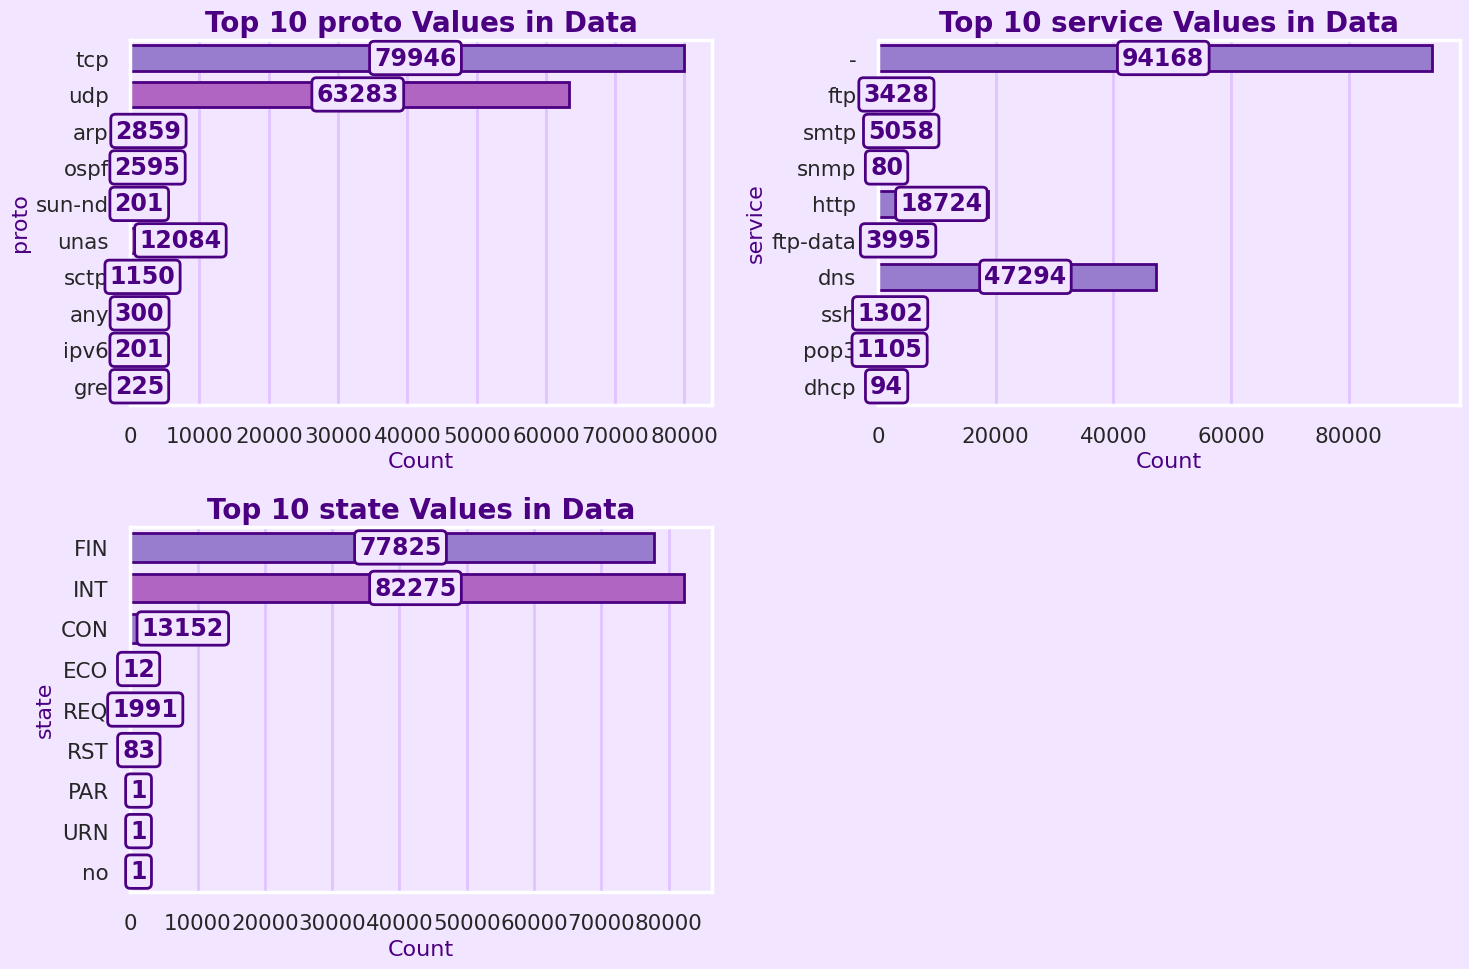

In [ ]:
Categorical_Features_TopN_Visualization(train, categorical_features)

In [ ]:
def Numerical_Feature_Visualization(data, features):
    """
    Visualizes the distribution of multiple numerical features in the dataset using histograms with KDE and markers for mean and median.

    Parameters:
    - data : DataFrame
        The dataset containing the numerical features.
    - features : list of str
        The list of numerical feature names to visualize.

    Returns:
    - None
        Displays the plot showing the distribution of the numerical features with mean and median markers.
    """

    # Define custom colors for the histogram and kernel density estimate
    hist_color = "#8a2be2"  # Blue violet
    line_color = "#4b0082"  # Indigo
    mean_line_color = "#ff4500"  # Orange red
    median_line_color = "#1e90ff"  # Dodger blue

    # Number of features to plot
    num_features = len(features)

    # Calculate number of rows needed (4 columns)
    num_columns = 4
    num_rows = (num_features + num_columns - 1) // num_columns  # Ceiling division to handle odd numbers of features

    # Create a figure with subplots
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * 5), sharex=False, sharey=False)
    axes = axes.flatten()  # Flatten the 2D array of axes to make indexing easier

    for i, feature in enumerate(features):
        # Create histogram with the violet theme colors
        histplot = sns.histplot(data=data, x=feature, bins=20, color=hist_color, edgecolor=line_color, kde=True, ax=axes[i])

        # Set the color for the kernel density line
        if histplot.get_lines():
            histplot.get_lines()[0].set_color(line_color)

        # Calculate mean and median
        mean_value = data[feature].mean()
        median_value = data[feature].median()

        # Add mean and median lines
        axes[i].axvline(mean_value, color=mean_line_color, linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
        axes[i].axvline(median_value, color=median_line_color, linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

        # Set labels and title with appropriate colors
        axes[i].set_title(f"Distribution of {feature}", color=line_color, fontsize=16, weight='bold')
        axes[i].set_xlabel(feature, color=line_color, fontsize=14)
        axes[i].set_ylabel("Count", color=line_color, fontsize=14)
        axes[i].legend()

    # Hide any unused subplots
    for j in range(num_features, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()


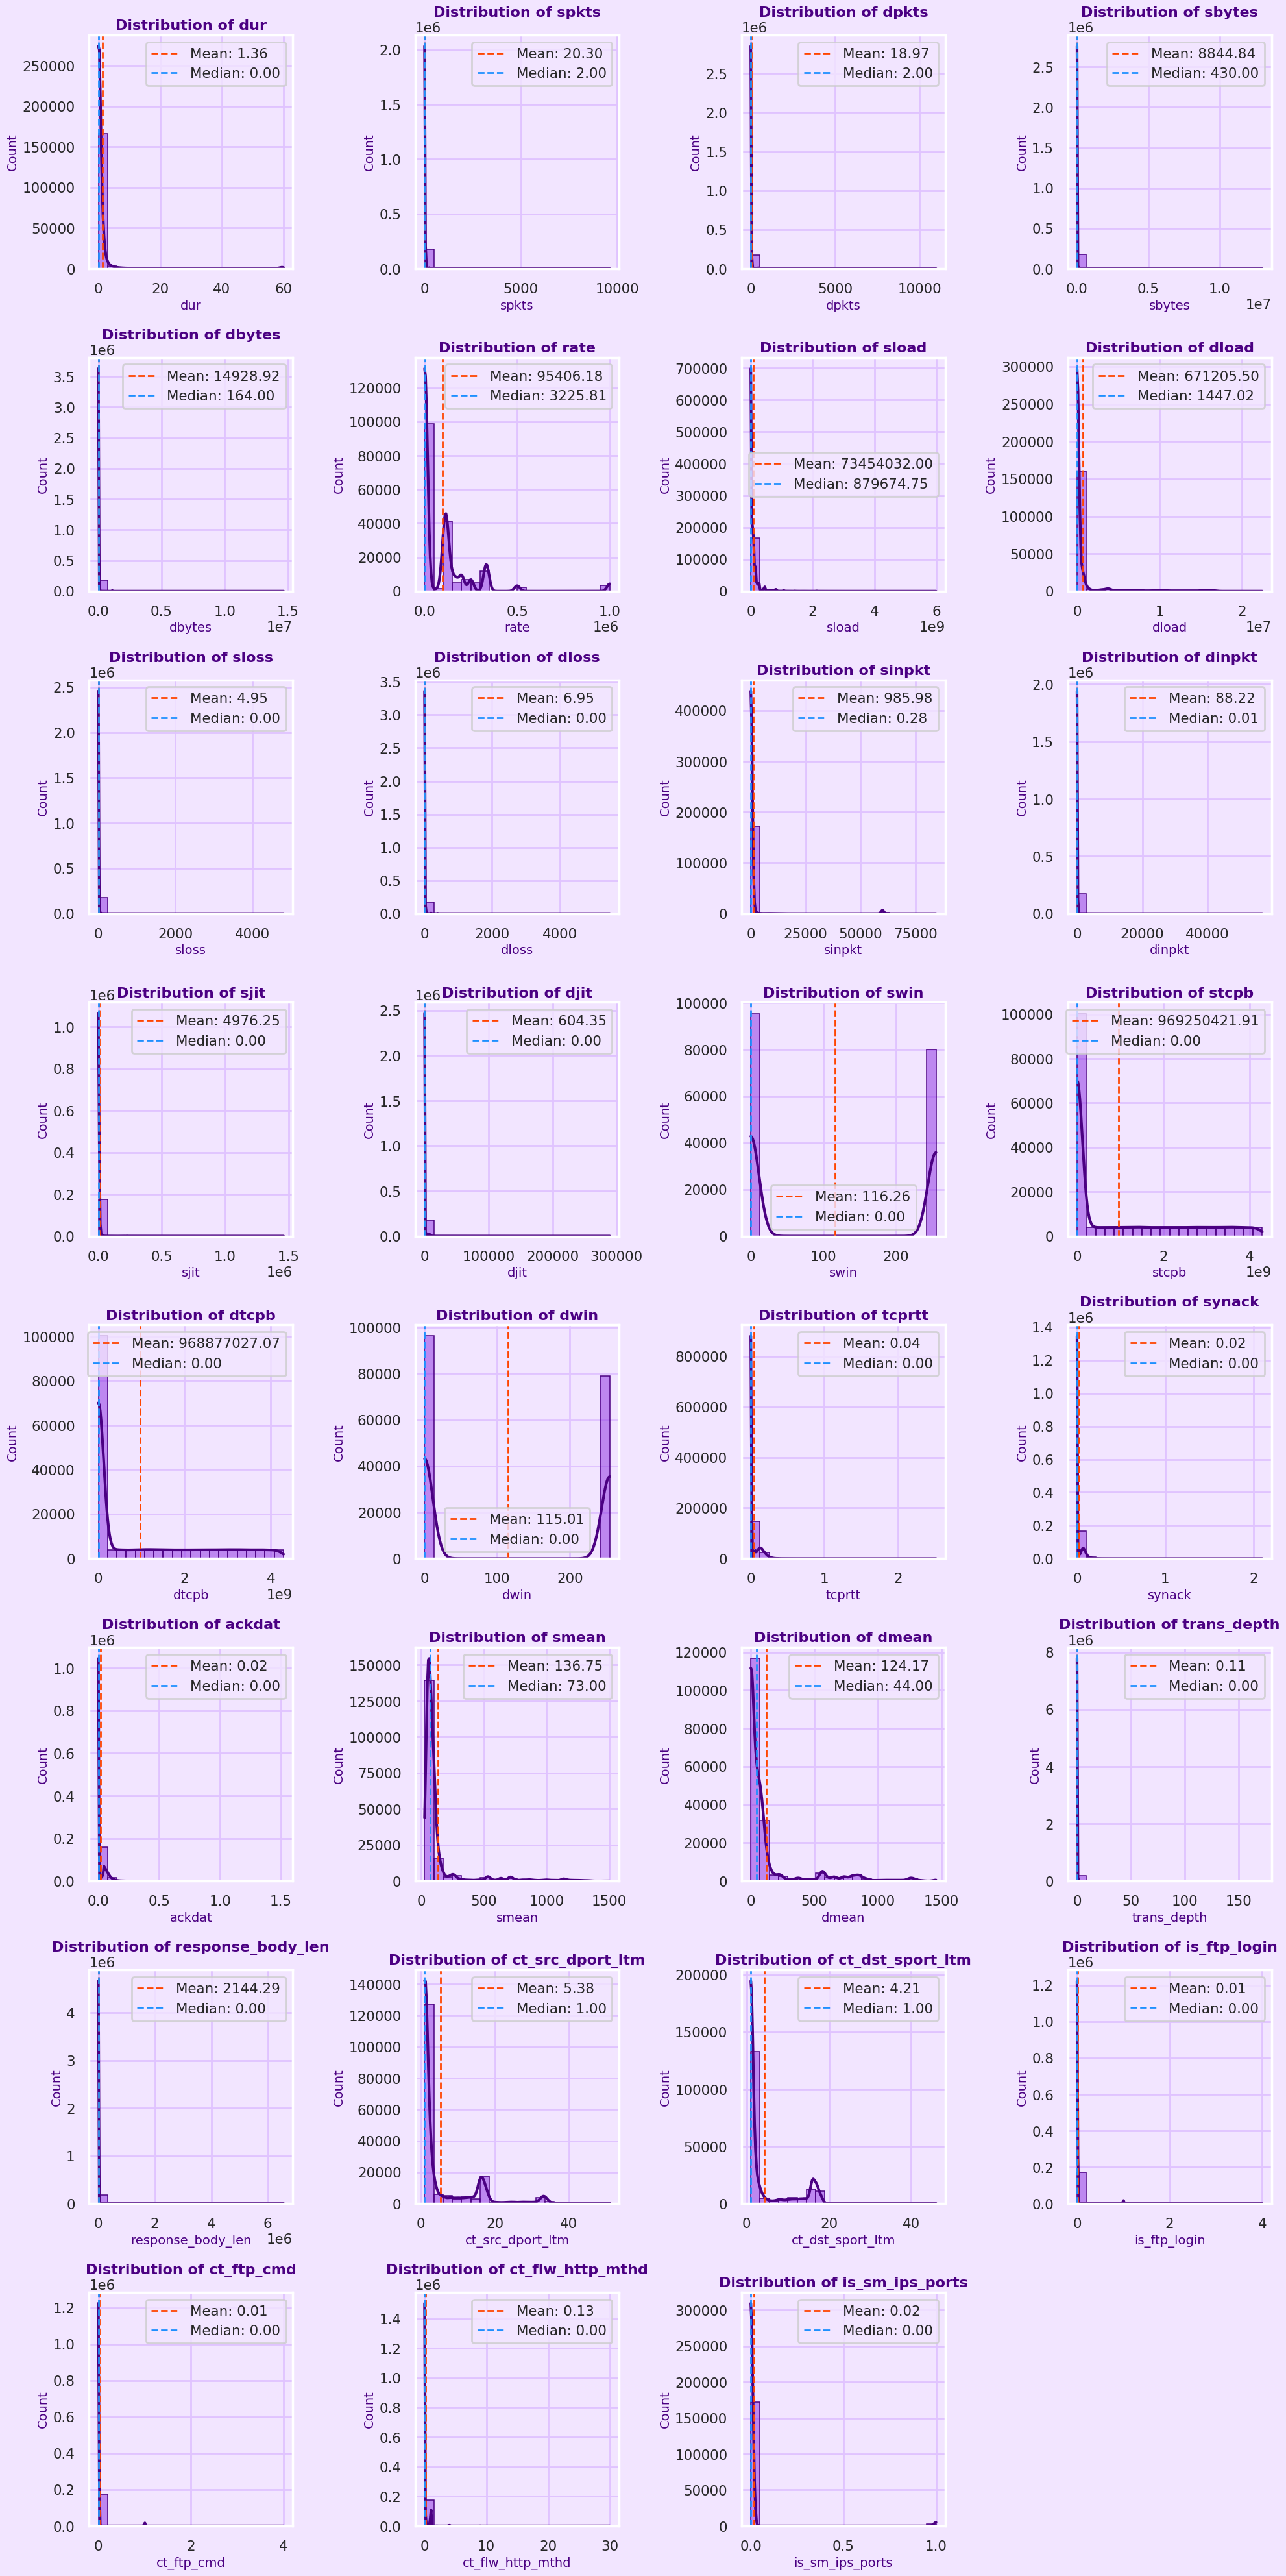

In [ ]:
Numerical_Feature_Visualization(train, numerical_features)

In [ ]:
def Target_Feature_Visualization(data, target):
    """
    Visualizes the distribution of a categorical target variable using a count plot and a defined color palette.

    Parameters:
    - data : DataFrame
        The dataset containing the target variable.
    - target : str
        The name of the categorical target column to visualize.

    Returns:
    - None
        Displays the plot showing the distribution of the target variable with different colors for each category.
    """

    # Create the plot
    plt.figure(figsize=(16, 8))
    ax = sns.countplot(x=target, data=data, palette=palette_cmap, edgecolor="#4b0082", linewidth=2, width=0.7)

    # Add labels to each bar for better visibility
    for container in ax.containers:
        ax.bar_label(container, label_type="center", color='#4b0082', fontsize=12, weight='bold',
                     padding=4, bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#f2e5ff",
                                      "edgecolor": '#4b0082', "linewidth": 2, "alpha": 1})

    # Set title and labels with appropriate colors and styles
    ax.set_title(f"Distribution of {target}", color="#4b0082", fontsize=16, weight='bold')
    ax.set_xlabel(target, color="#4b0082", fontsize=14)
    ax.set_ylabel("Count", color="#4b0082", fontsize=14)

    # Show the plot
    plt.tight_layout()
    plt.show()


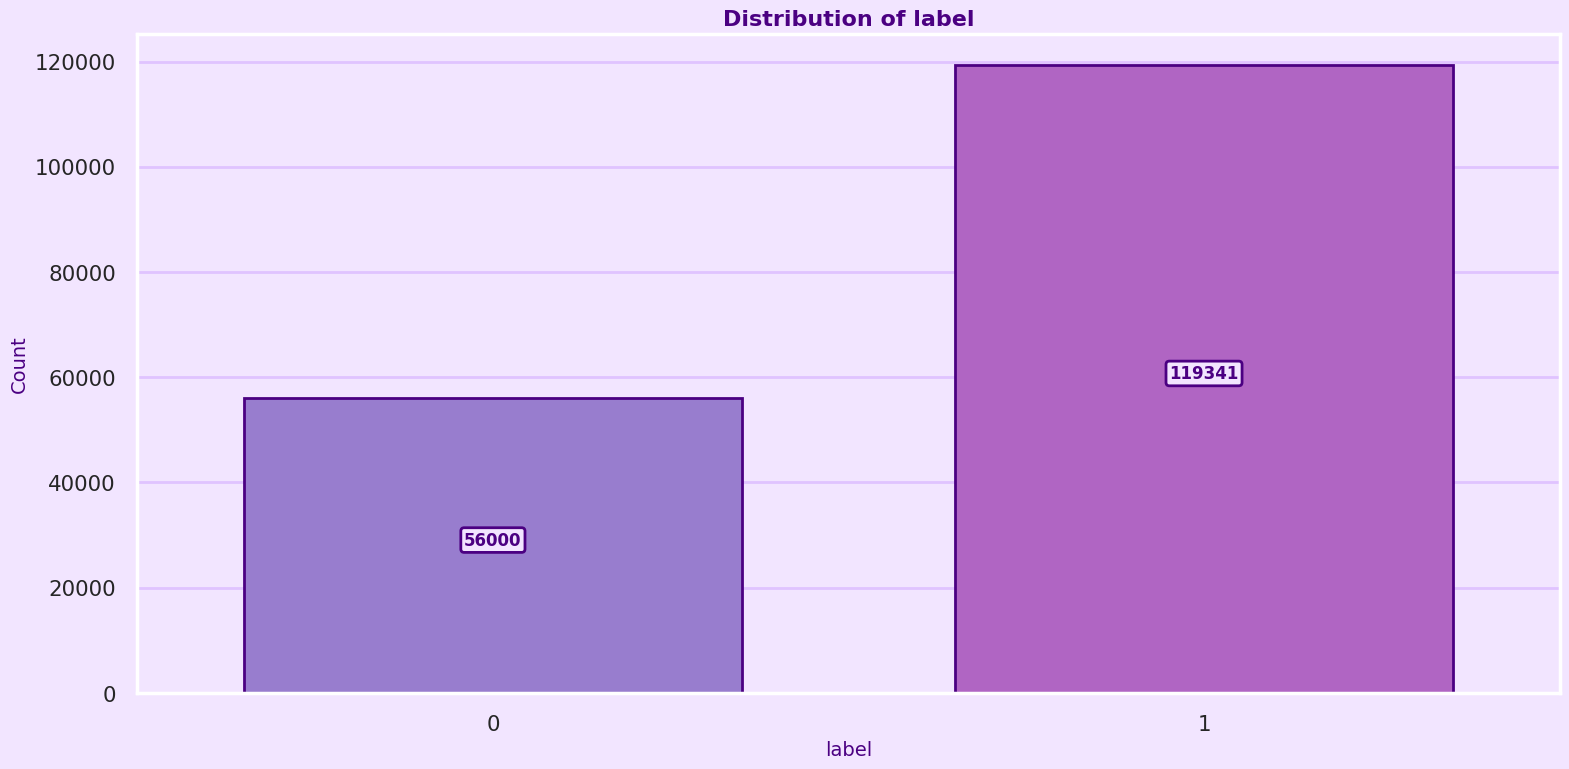

In [ ]:
Target_Feature_Visualization(train, 'label')

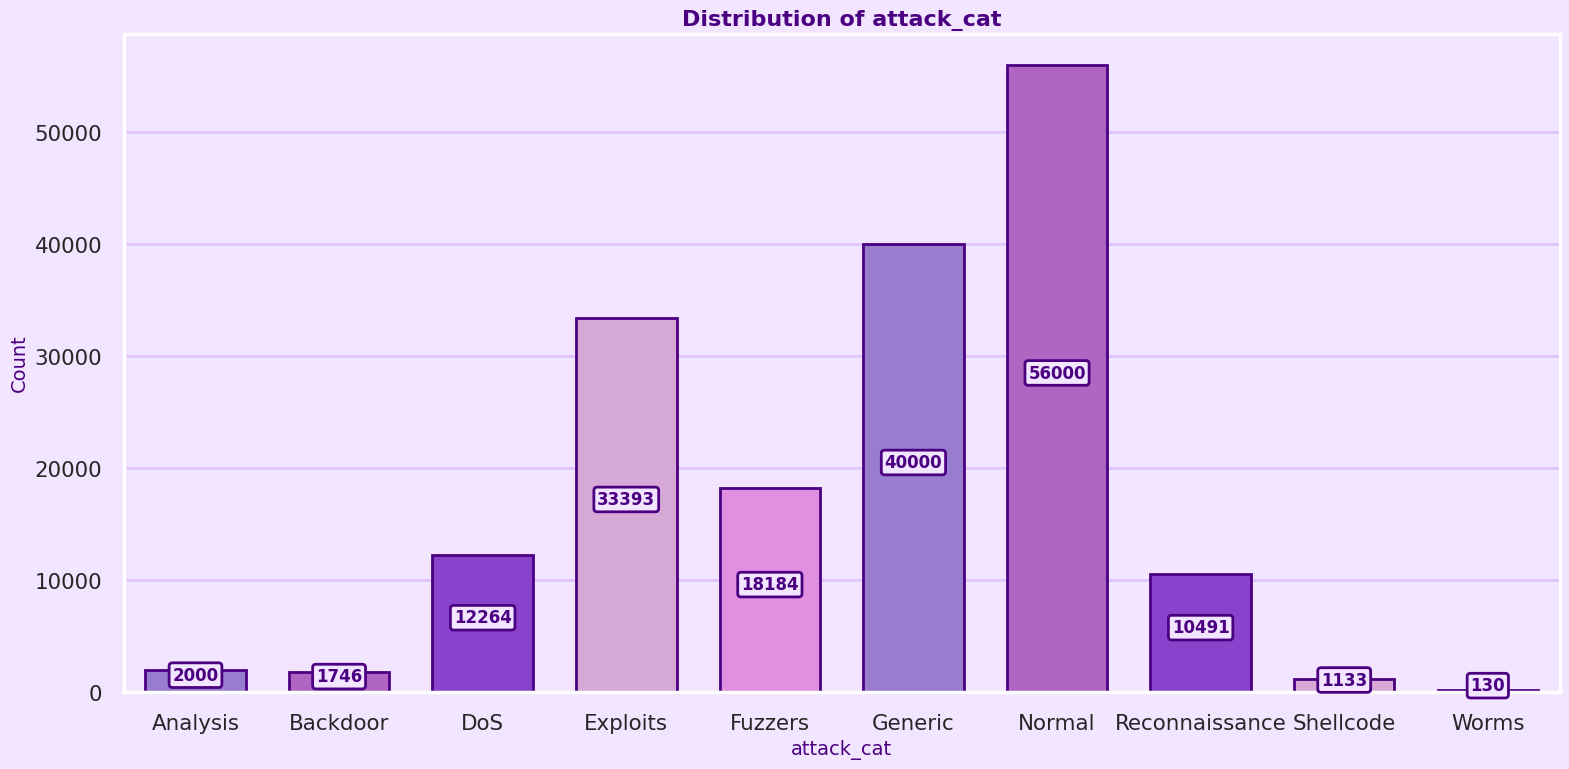

In [ ]:
Target_Feature_Visualization(train, 'attack_cat')

In [ ]:
def Categorical_Features_TopN_Distribution_Visualization(data, categorical_features, target_feature, top_n=10):
    """
    Visualizes the distribution of the top N unique values for a list of categorical features in the dataset,
    grouped by the target feature, using count plots in a two-column layout.

    Parameters:
    - data : DataFrame
        The dataset containing the categorical features.
    - categorical_features : list of str
        The list of categorical features to visualize.
    - target_feature : str
        The target feature used for hue in the count plot.
    - top_n : int, optional (default=10)
        The number of top unique values to visualize for each categorical feature.

    Returns:
    - None
        Displays the plots showing the distribution of the top N unique values for each categorical feature, grouped by the target feature.
    """

    num_features = len(categorical_features)

    # Calculate the number of rows needed
    num_rows = (num_features + 1) // 2

    # Create figure and axes for subplots with larger figure size
    fig, axs = plt.subplots(num_rows, 2, figsize=(20, 8 * num_rows))

    # Flatten the axes array for easier indexing
    axs = axs.flatten()

    # Iterate over categorical features
    for i, feature in enumerate(categorical_features):
        # Calculate the top N unique values by count
        top_values = data[feature].value_counts().nlargest(top_n).index

        # Filter the dataset to include only the top N unique values
        data_top_n = data[data[feature].isin(top_values)]

        # Plot for each categorical feature
        p = sns.countplot(ax=axs[i], y=feature, hue=target_feature, data=data_top_n,
                          palette=palette[1:3], edgecolor='#4b0082', linewidth=2)

        axs[i].set_title(f'Distribution of Top {top_n} {feature} Values', color="#4b0082", fontsize=20, weight='bold')
        axs[i].set_xlabel('Count', color="#4b0082", fontsize=16)
        axs[i].set_ylabel(feature, color="#4b0082", fontsize=16)

    # Remove any unused subplots
    if num_features % 2 != 0:
        fig.delaxes(axs[-1])

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()


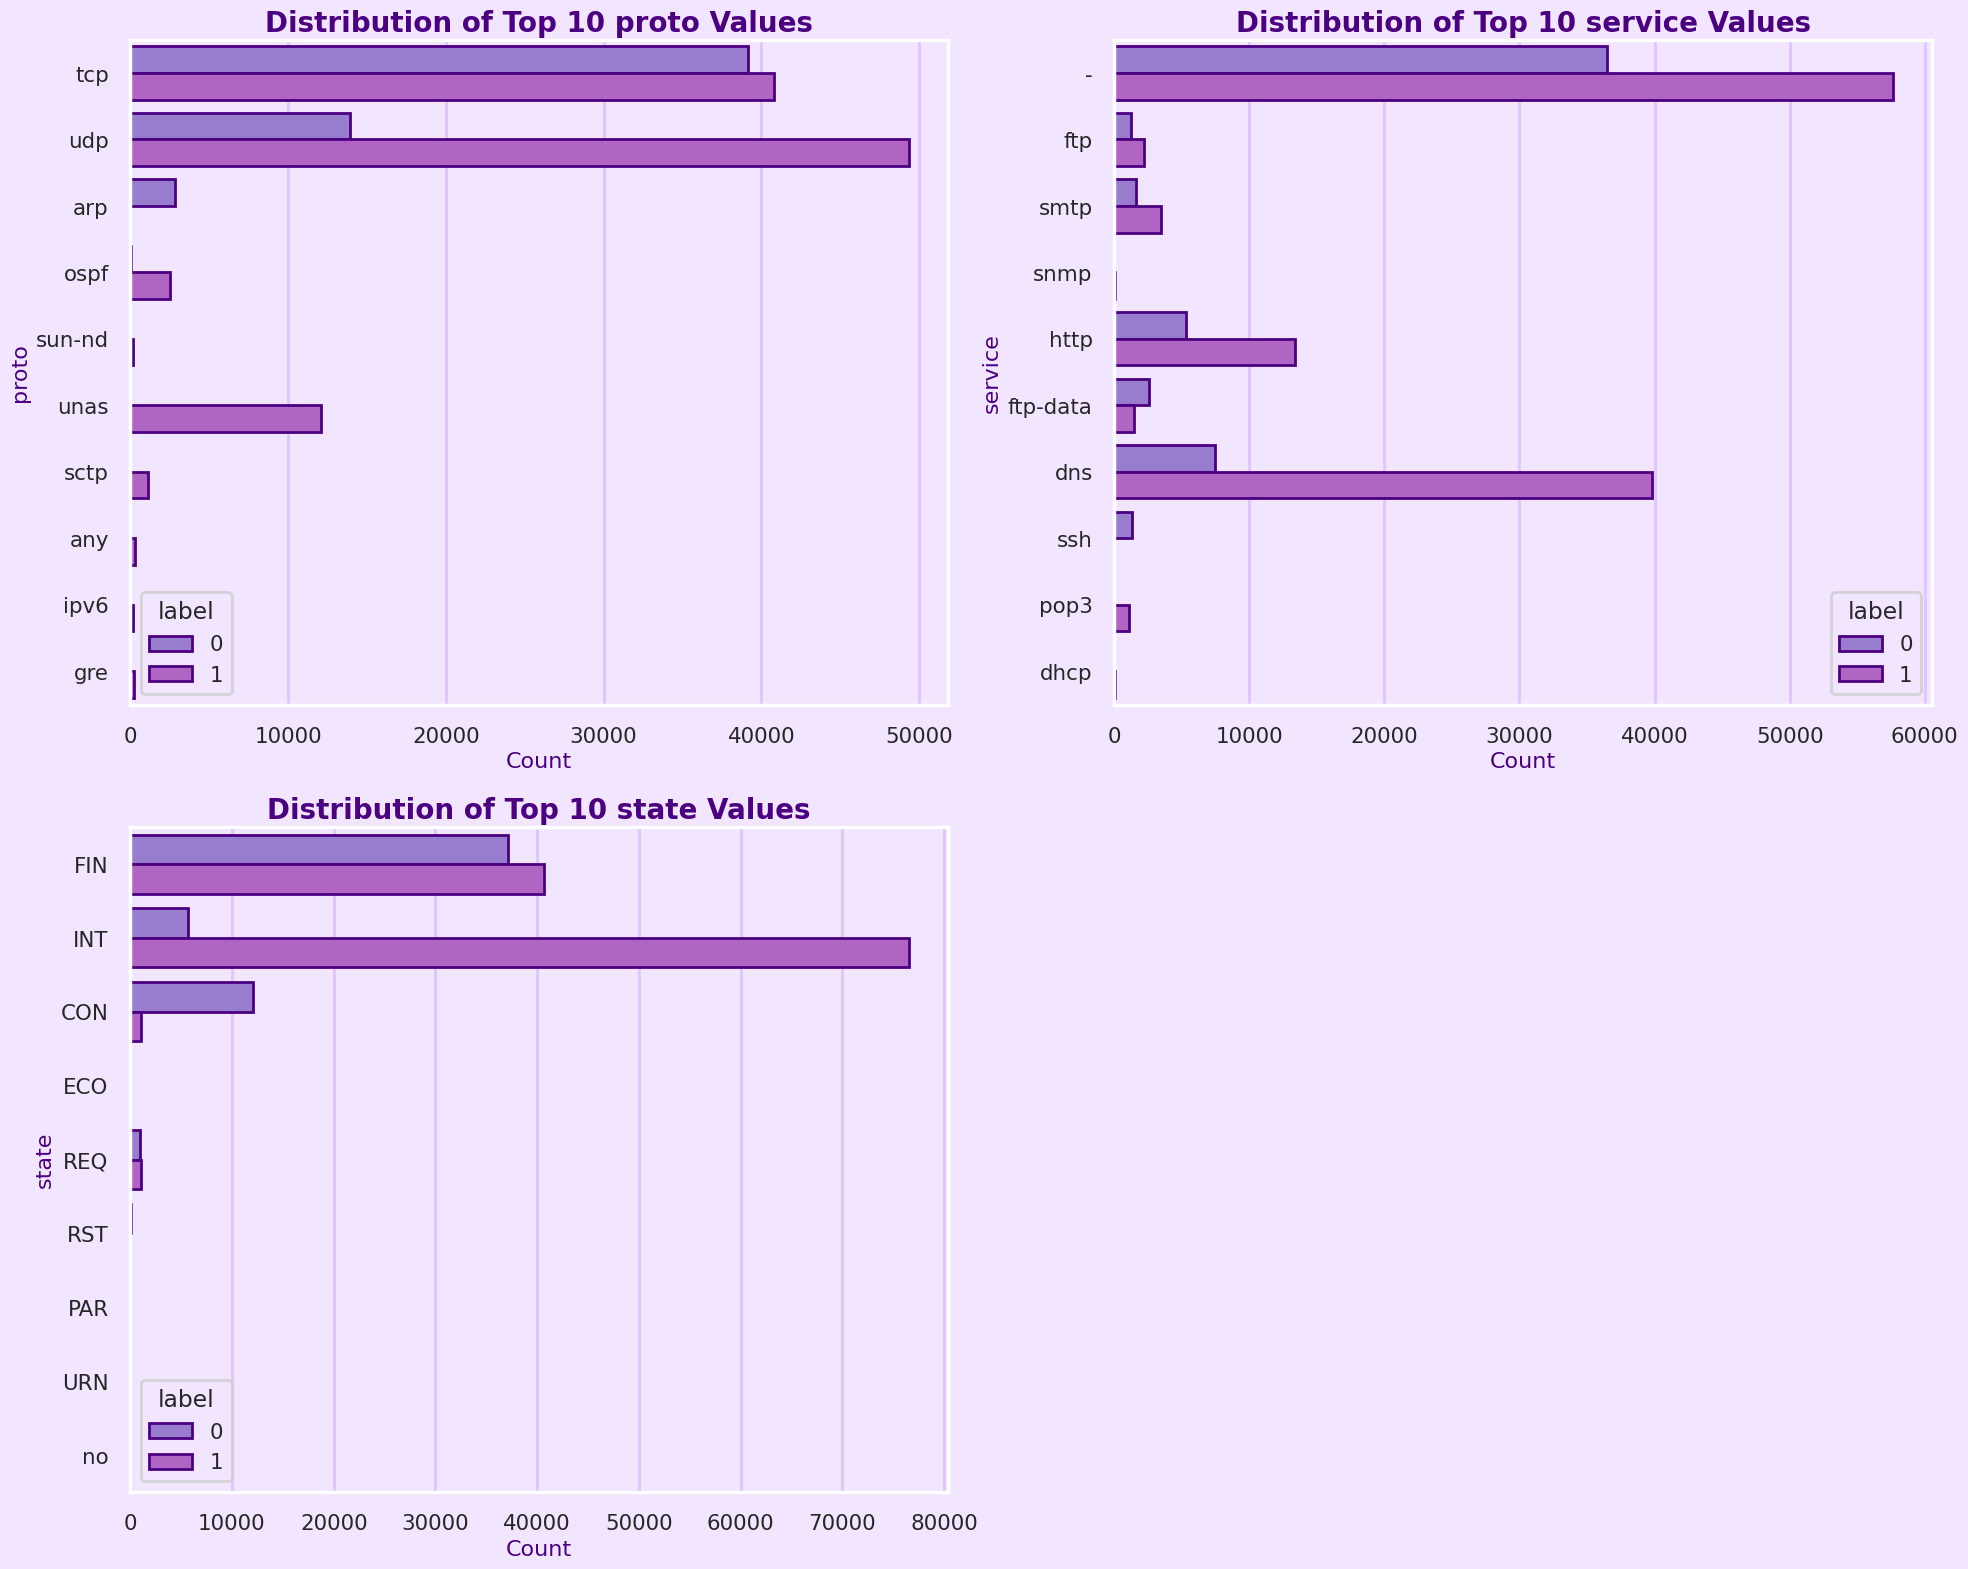

In [ ]:
Categorical_Features_TopN_Distribution_Visualization(train, categorical_features, 'label')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def Categorical_Features_TopN_Distribution_ByTarget(data, categorical_features, target_feature, top_n=10):
    """
    Visualizes the distribution of the top N unique values for each categorical feature in the dataset,
    with each unique value further grouped by the top 3 most frequent classes of the target feature.

    Parameters:
    - data : DataFrame
        The dataset containing the categorical features.
    - categorical_features : list of str
        The list of categorical features to visualize.
    - target_feature : str
        The multiclass target feature used for hue in the count plot.
    - top_n : int, optional (default=10)
        The number of top unique values to visualize for each categorical feature.

    Returns:
    - None
        Displays the plots showing the distribution of the top N unique values for each categorical feature,
        grouped by the top 3 most frequent classes of the target feature for each unique feature value.
    """

    num_features = len(categorical_features)

    # Calculate the number of rows needed for a two-column layout
    num_rows = (num_features + 1) // 2

    # Create figure and axes for subplots with larger figure size
    fig, axs = plt.subplots(num_rows, 2, figsize=(20, 8 * num_rows))

    # Flatten the axes array for easier indexing
    axs = axs.flatten()

    # Iterate over each categorical feature
    for i, feature in enumerate(categorical_features):
        # Identify the top N unique values by count for the current feature
        top_values = data[feature].value_counts().nlargest(top_n).index

        # Prepare a filtered dataset containing only the top N unique values for the current feature
        data_top_n = data[data[feature].isin(top_values)]

        # Initialize a new DataFrame to hold only the top 3 classes for each top N value of the feature
        data_filtered = pd.DataFrame()

        # For each top feature value, get the top 3 target classes by frequency
        for value in top_values:
            top_3_classes = data_top_n[data_top_n[feature] == value][target_feature].value_counts().nlargest(3).index
            data_value_filtered = data_top_n[(data_top_n[feature] == value) &
                                             (data_top_n[target_feature].isin(top_3_classes))]
            data_filtered = pd.concat([data_filtered, data_value_filtered])

        # Plot for each categorical feature
        p = sns.countplot(ax=axs[i], y=feature, hue=target_feature, data=data_filtered,
                          palette="Set2", edgecolor='#4b0082', linewidth=2)

        axs[i].set_title(f'Distribution of Top {top_n} {feature} Values by {target_feature} (Top 3 Classes)',
                         color="#4b0082", fontsize=20, weight='bold')
        axs[i].set_xlabel('Count', color="#4b0082", fontsize=16)
        axs[i].set_ylabel(feature, color="#4b0082", fontsize=16)

    # Remove any unused subplots if the number of features is odd
    if num_features % 2 != 0:
        fig.delaxes(axs[-1])

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()


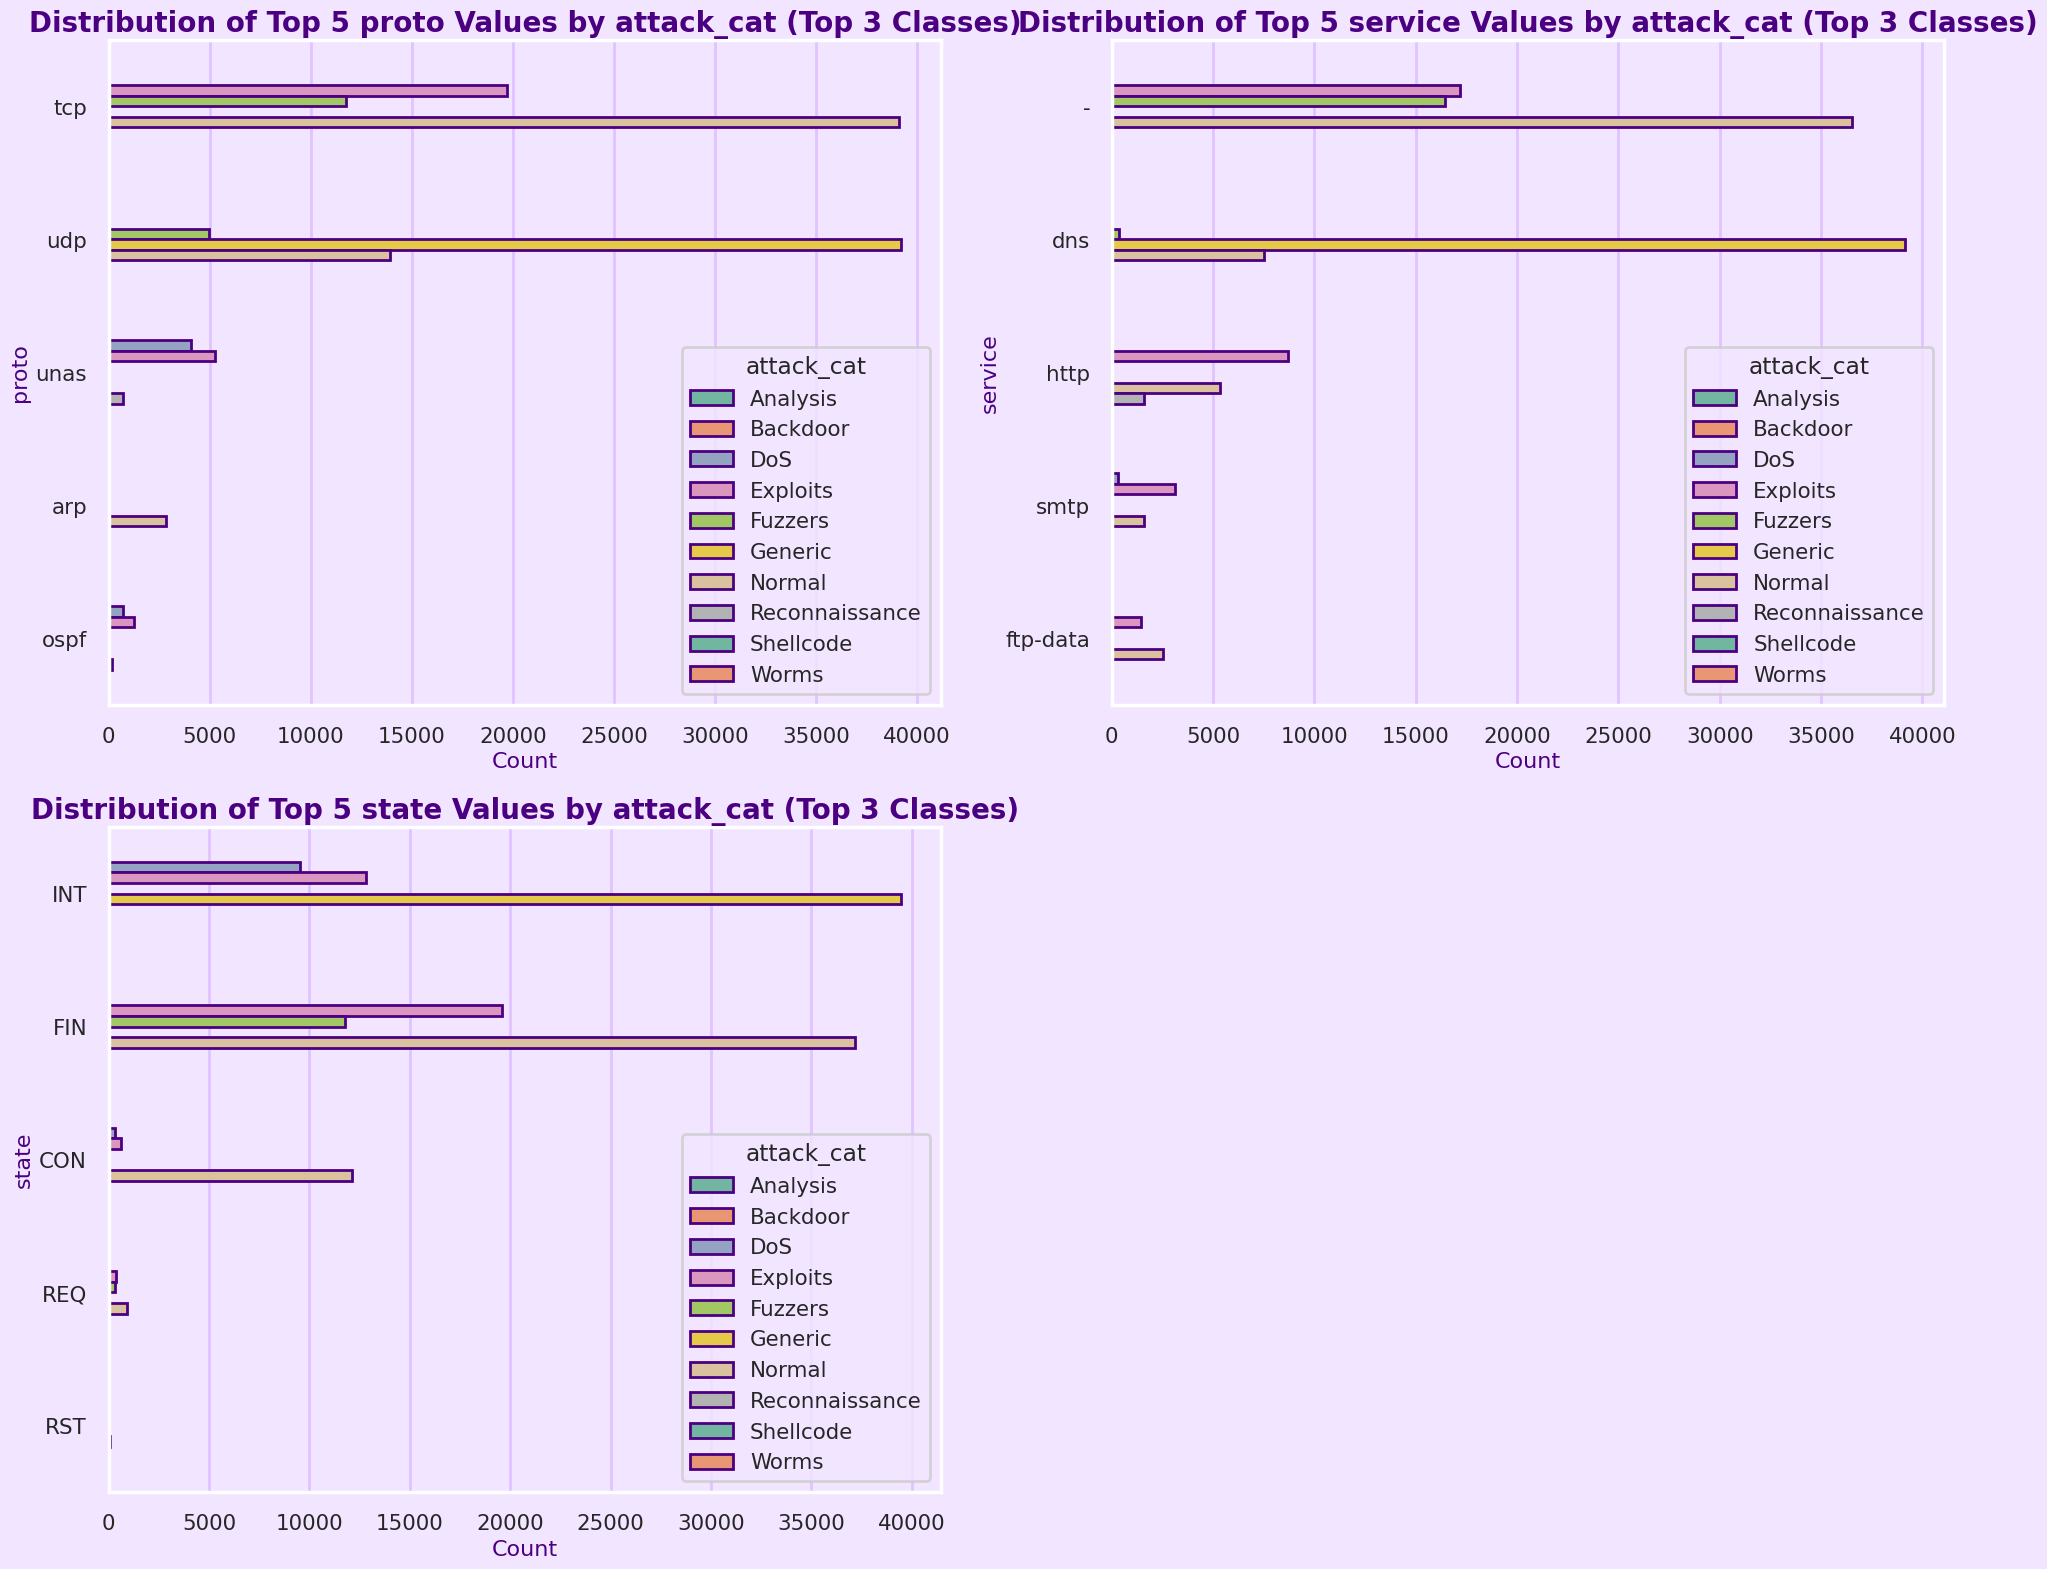

In [ ]:
Categorical_Features_TopN_Distribution_ByTarget(train, categorical_features, 'attack_cat', 5)

# Correlation Plotting

# Pearson Method

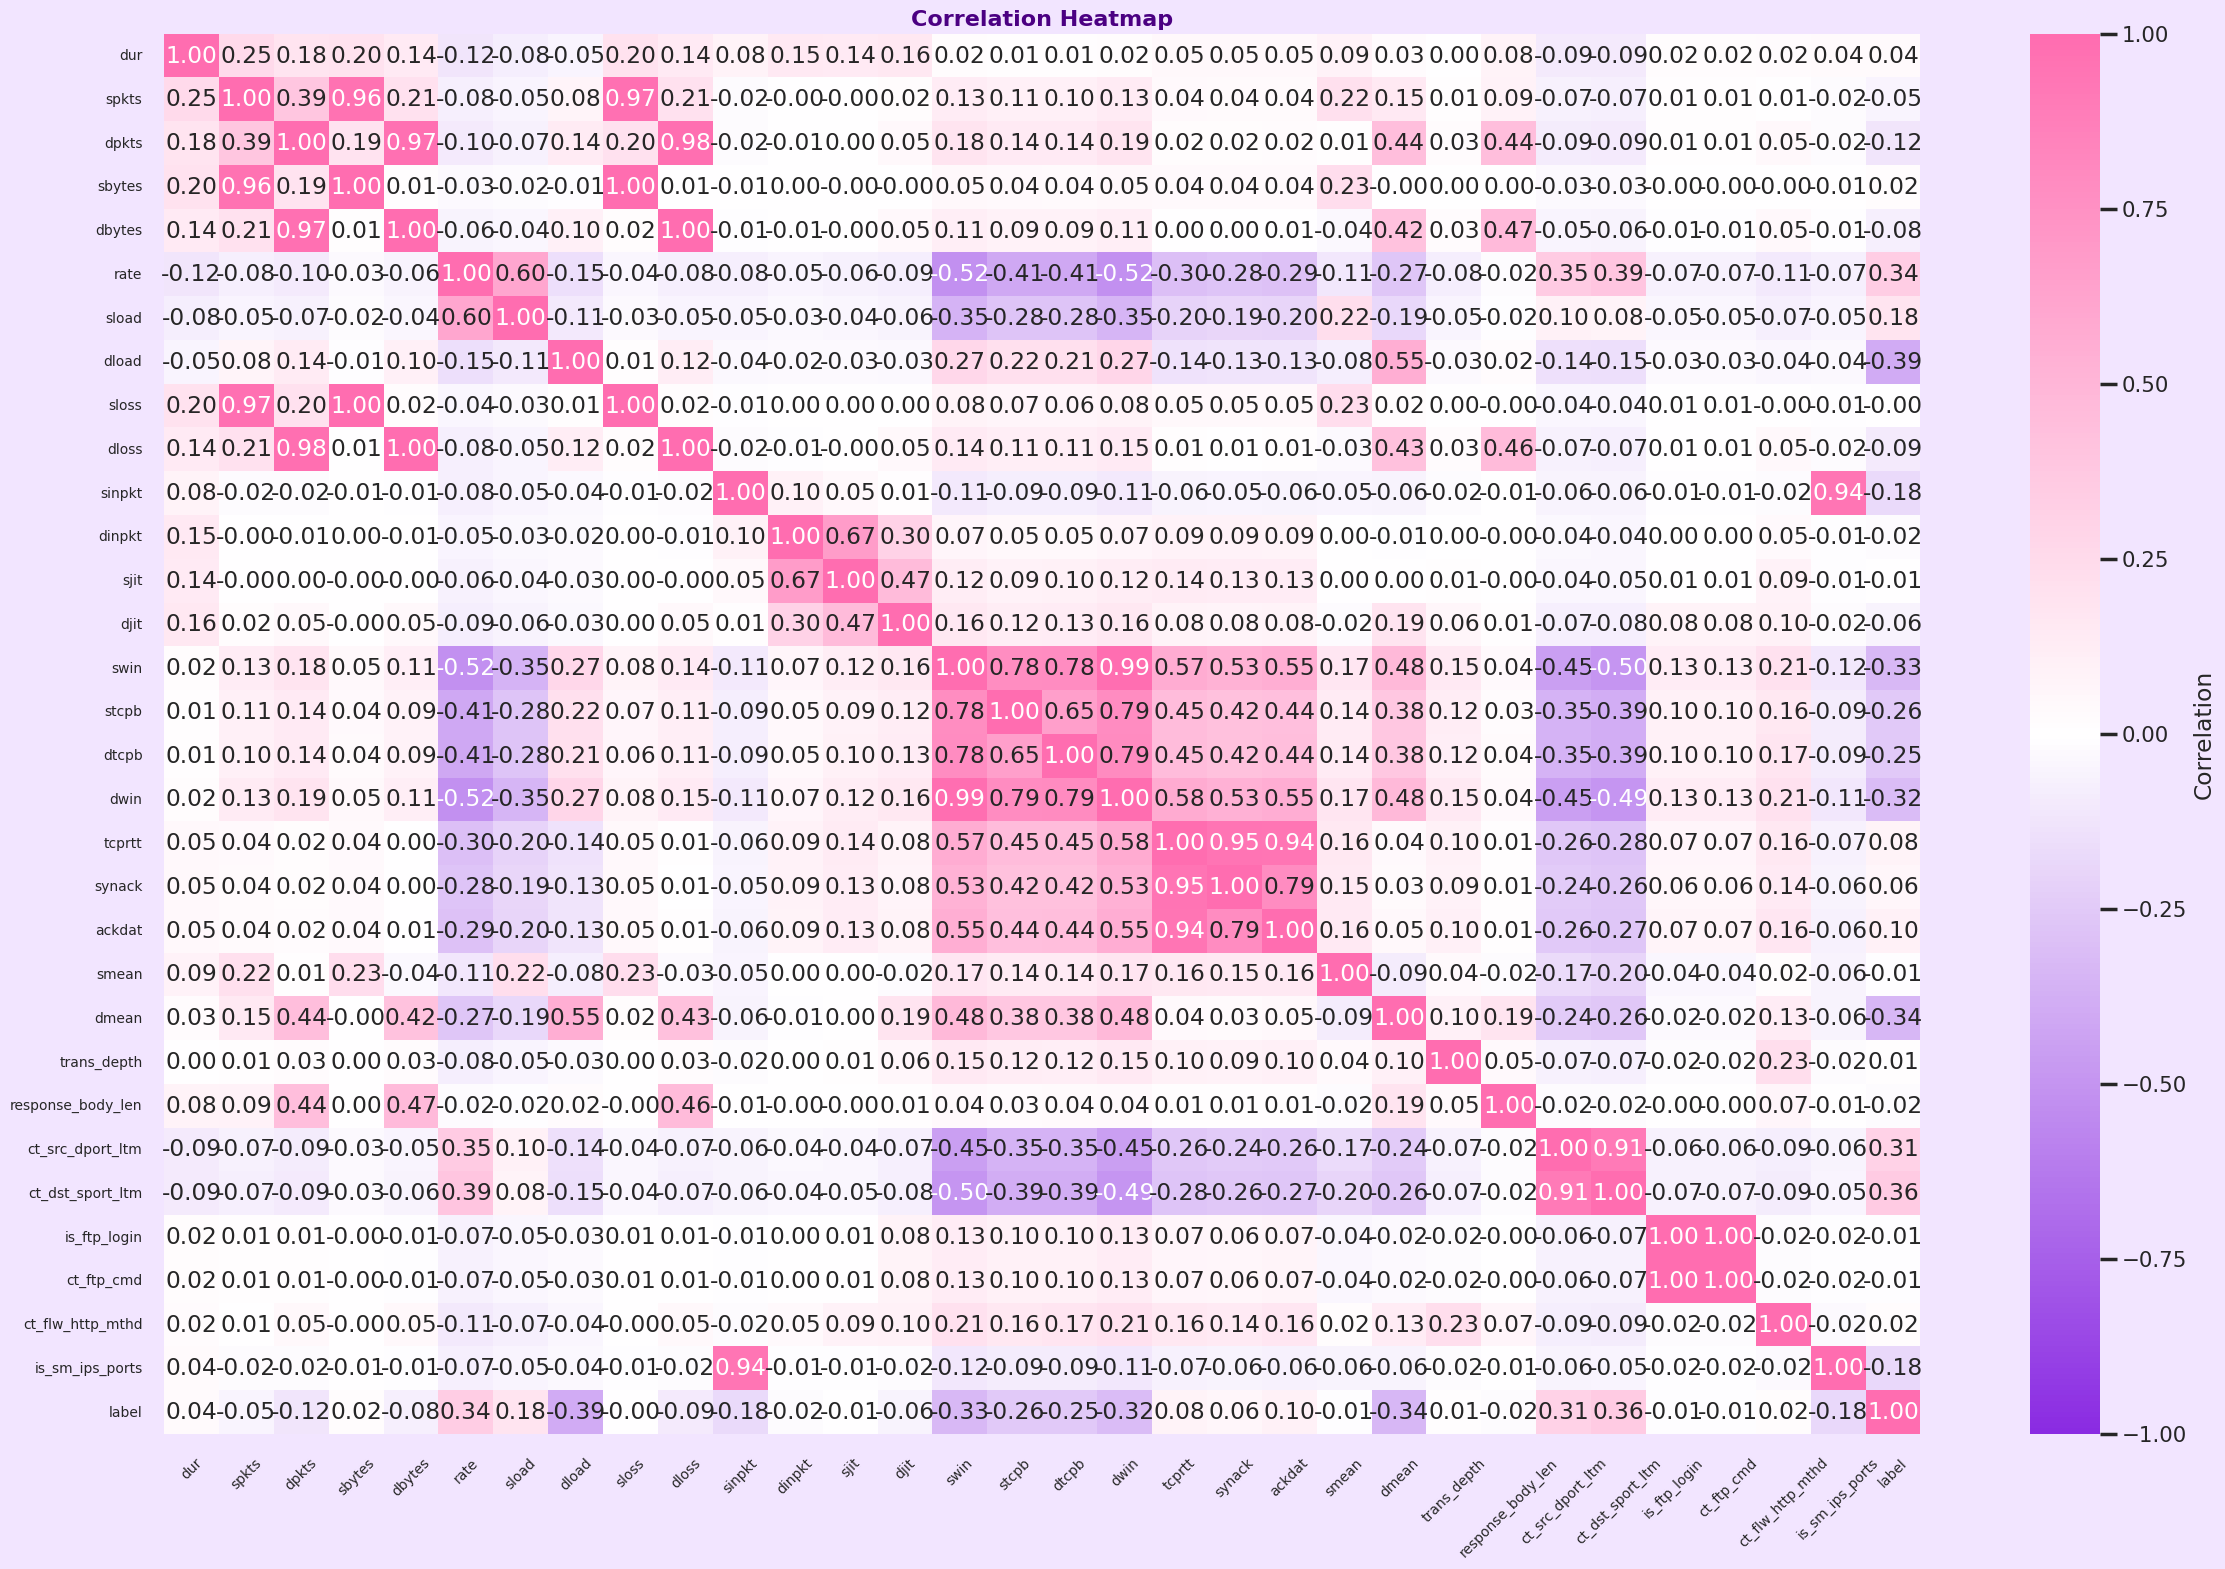

In [ ]:
# Compute correlation matrix for numerical columns only (method='pearson')
corr_matrix = train.select_dtypes(include=[np.number]).corr(method='pearson')


# Define custom colormap with colors for positive, negative, and neutral correlations
colors = ["#8a2be2", "#ffffff", "#ff6db0"]  # Positive to negative: violet to white to pink
cmap = LinearSegmentedColormap.from_list("Custom", colors, N=256)

# Plot heatmap with custom styling
plt.figure(figsize=(24, 16))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt='.2f',
                      vmin=-1, vmax=1, center=0,
                      cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap', fontsize=16, weight='bold', color='#4b0082')  # Adjust title properties
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.yticks(rotation=0)   # Rotate y-axis labels if needed
plt.tick_params(axis='both', which='major', labelsize=10)  # Set smaller tick label size

# Show plot
plt.tight_layout()       # Adjust layout for better spacing
plt.show()

## Spearman Method

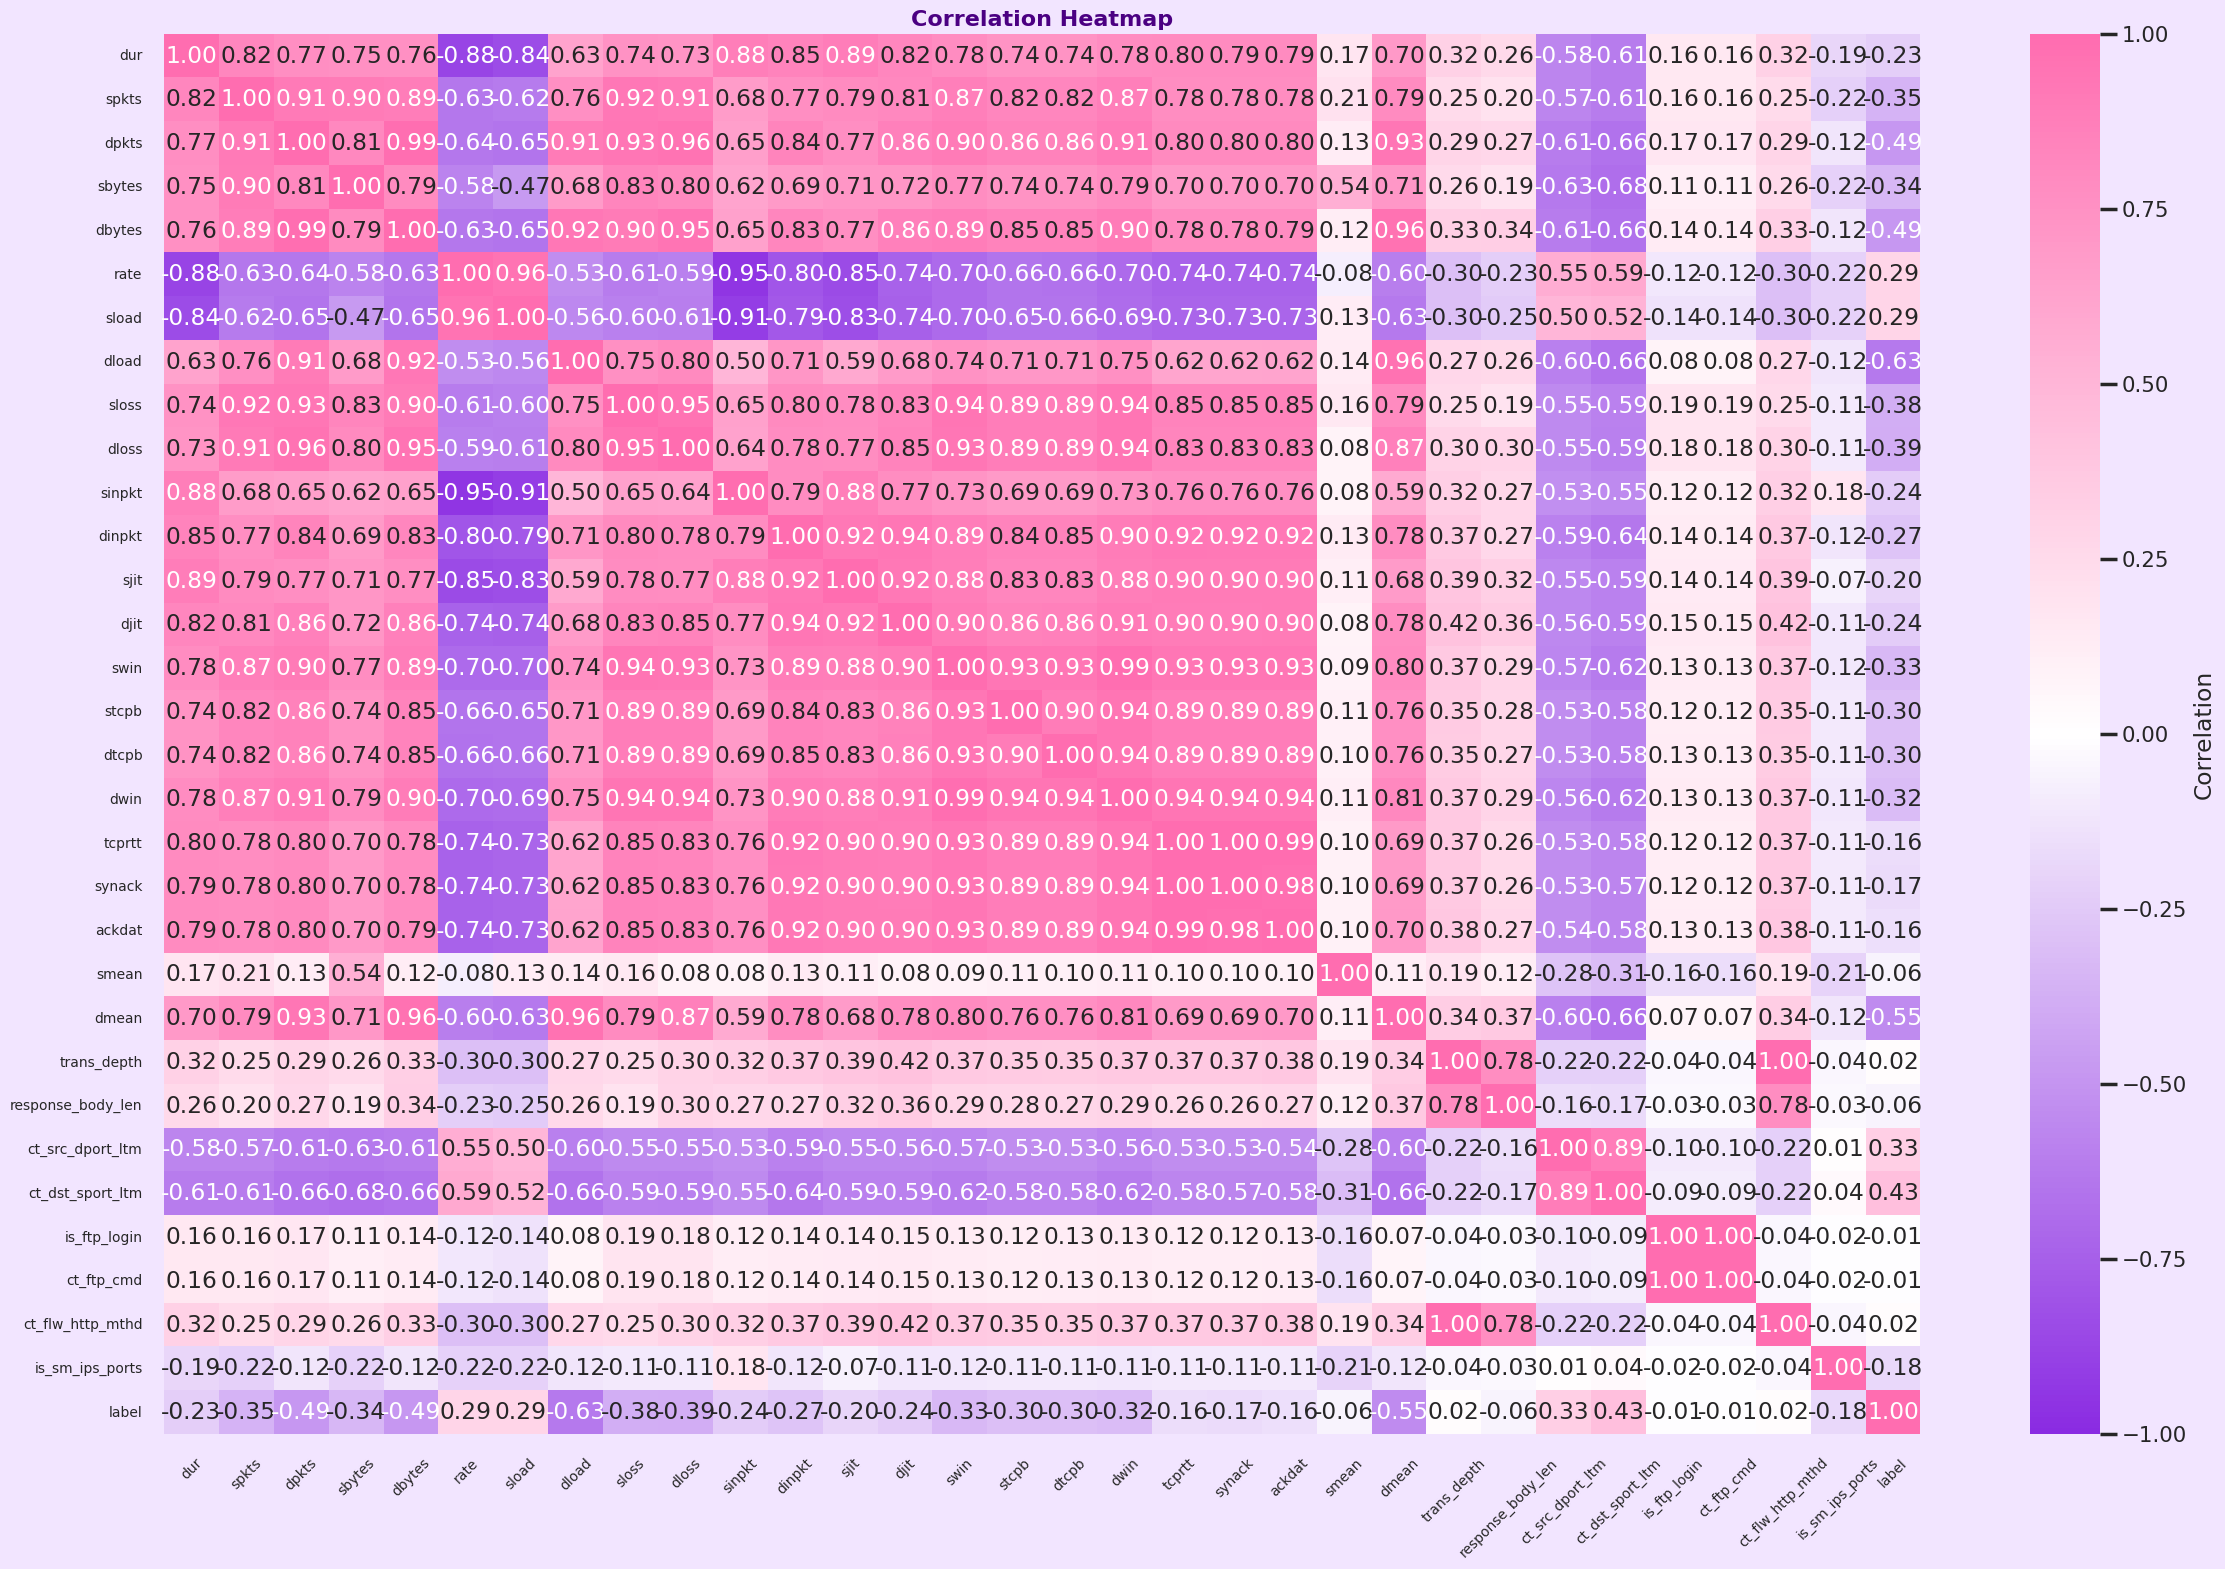

In [ ]:
# Compute correlation matrix for numerical columns only (method='spearman')
corr_matrix = train.select_dtypes(include=[np.number]).corr(method='spearman')


# Define custom colormap with colors for positive, negative, and neutral correlations
colors = ["#8a2be2", "#ffffff", "#ff6db0"]  # Positive to negative: violet to white to pink
cmap = LinearSegmentedColormap.from_list("Custom", colors, N=256)

# Plot heatmap with custom styling
plt.figure(figsize=(24, 16))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt='.2f',
                      vmin=-1, vmax=1, center=0,
                      cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap', fontsize=16, weight='bold', color='#4b0082')  # Adjust title properties
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.yticks(rotation=0)   # Rotate y-axis labels if needed
plt.tick_params(axis='both', which='major', labelsize=10)  # Set smaller tick label size

# Show plot
plt.tight_layout()       # Adjust layout for better spacing
plt.show()

# Mutual Information

In [132]:
def calculate_mutual_information(X, y):
    """
    Calculate mutual information between the target and each feature.

    Args:
        X : DataFrame : Input features
        y : Series or array-like : Target variable

    Returns:
        Series : Mutual information values for each feature
    """
    # Ensure y is in the correct format
    if isinstance(y, pd.Series):
        y = y.values  # Convert to numpy array if it is a pandas Series
        
    # Calculate mutual information
    mi = mutual_info_classif(X_encoded, y, discrete_features='auto')
    mi_series = pd.Series(mi, index=X_encoded.columns, name='Mutual Information').sort_values(ascending=False)

    return mi_series

In [133]:
calculate_mutual_information(train[numerical_features], train['label'])

,Mutual Information
sbytes,0.467404
dbytes,0.370872
rate,0.353483
sload,0.347137
dur,0.339154
smean,0.335297
dmean,0.313268
dinpkt,0.297870
dload,0.281032
dpkts,0.273912


In [134]:
calculate_mutual_information(train[numerical_features], train['attack_cat'])

,Mutual Information
sbytes,1.150388
smean,0.930568
sload,0.905933
dbytes,0.633845
rate,0.551536
dmean,0.547245
dur,0.536995
ct_dst_sport_ltm,0.521949
dload,0.481943
dinpkt,0.473552
